# Preprocessing

In [140]:
from pathlib import Path 
from fastai.vision import *
import librosa 
import librosa.display

In [141]:
path = %pwd
path = Path(f'{path}/../../data/audio_pil_og_flue')

In [142]:
#path.ls()

In [143]:
audio_class = 'blink'

In [144]:
audio_path = path/f'audio_files/{audio_class}/'
save_path_melspectogram = path/'melspectogram/blink'
save_path_waveform = path/'waveform/blink'
#save_path_spectogram = path/'spectogram/blink'

In [145]:
audio_path.ls()[0]

PosixPath('/home/sathiesh/machine_learning/own_projects/audio_classification/../../data/audio_pil_og_flue/audio_files/blink/blink_27.wav')

In [120]:
def get_filename(path):
    return os.path.basename(path)

## Melspectogram

The following two methods are from the tutorial <i>Audio Classification using DeepLearning for Image Classification</i>: https://dzlab.github.io/jekyll/update/2018/11/13/audio-classification/

In [121]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, sr=None)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    plt.show()
    plt.draw()
    fig1.savefig(image_fname, dpi=100)

In [122]:
def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for audio_path in audio_dir_path.ls():
        audio_filename = get_filename(audio_path)
        image_fname = audio_filename.split('.')[0] + '.png'
        if image_dir_path:
            image_fname = image_dir_path.as_posix() + '/' + image_fname
        if Path(image_fname).exists(): continue
        try:
            save_spectrogram(audio_path.as_posix(), image_fname)
        except ValueError as verr:
            print('Failed to process %s %s' % (image_fname, verr))

In [123]:
audio_to_spectrogram(audio_path, save_path_melspectogram)

# Raw
https://github.com/CVxTz/audio_classification/blob/master/LICENSE

In [124]:
input_length = 16000*2

def audio_norm(data):

    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

In [125]:
def load_audio_file(file_path, input_length=input_length):
    data = librosa.core.load(file_path, sr=16000)[0] #, sr=16000
    if len(data)>input_length:
        
        
        max_offset = len(data)-input_length
        
        offset = np.random.randint(max_offset)
        
        data = data[offset:(input_length+offset)]
        
        
    else:
        
        max_offset = input_length - len(data)
        
        offset = np.random.randint(max_offset)
        
        
        data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
        
        
    data = audio_norm(data)
    return data

In [180]:
x = []
y = []
classes = ['blink','kork','skive']
for c in classes: 
    audio_path = path/f'audio_files/{c}/'
    print(audio_path)
    
    for file_path in audio_path.ls():
        data = load_audio_file(file_path)
        x.append(data)
        y.append(c)

/home/sathiesh/machine_learning/own_projects/audio_classification/../../data/audio_pil_og_flue/audio_files/blink
/home/sathiesh/machine_learning/own_projects/audio_classification/../../data/audio_pil_og_flue/audio_files/kork
/home/sathiesh/machine_learning/own_projects/audio_classification/../../data/audio_pil_og_flue/audio_files/skive


In [183]:
np.array(x).shape

(90, 32000)

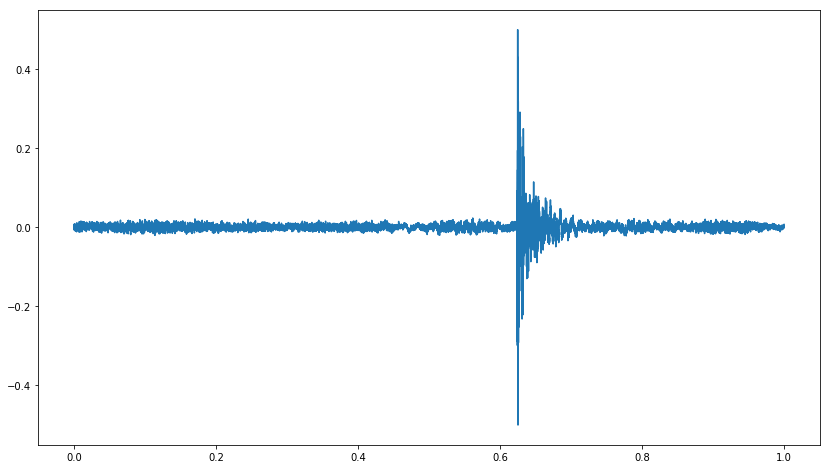

In [127]:
#data_base = load_audio_file(audio_path.ls()[4])
#fig = plt.figure(figsize=(14, 8))
#plt.plot(np.linspace(0, 1, input_length), data_base)
#plt.show()

In [91]:
#data, sample_rate = librosa.load(audio_path.ls()[4], sr=None)
#plt.figure(figsize=(12, 4))
#librosa.display.waveplot(data, sr=sample_rate)